
<a id='tools-editors'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Julia Ferramentas e Editores

## Conteúdo

- [Julia Ferramentas e Editores](#Julia-Ferramentas-e-Editores)  
  - [Configurações Preliminares](#Configurações-Preliminares)  
  - [O REPL](#O-REPL)  
  - [Atom](#Atom)  
  - [Ambiente de Pacotes](#Ambiente-de-Pacotes)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

Co-escrito com Arnav Sood

Enquanto os notebooks Jupiter se tornam um meio para você se familiarizar com a languagem, eventualmente serão necessárias ferramentas mais poderosas.

Iremos discutir algumas delas aqui, como:

- Editores de texto como Atom, que vem com um rico suporte para Julia para depuração, documentação, integração git, plot e análise de dados,bem como execução de códigos.  
- O Julia REPL, que tem modos especializados para gerenciamento do pacote, comandos, e ajuda;  
- Uma configuração virtualizada Docker que provê um ambiente pré-configurado fácil no seu aparelho.  


Note que nós assumimos que você já completou as aulas de [Configurando seu Ambiente no Julia](https://lectures.quantecon.org/getting_started_julia/getting_started.html) e [interagindo com Julia](https://lectures.quantecon.org/getting_started_julia/julia_environment.html).

## Configurações Preliminares

Siga as instruções para configurar o Julia [no seu próprio computador](https://lectures.quantecon.org/getting_started_julia/getting_started.html#jl-jupyterlocal).


<a id='jl-startup-file'></a>

### Criando um arquivo de inicialização (recomendado)

Sempre que o compilador Julia ou o REPL iniciarem, irá aparecer um arquivo chamado `startup.jl` (veja [Julia Manual](https://docs.julialang.org/en/v1/manual/getting-started/#man-getting-started-1)).

Nós providenciamos um arquivo com dupla utilidade:

- Constrói o modo casca REPL como “pegajosa”, assim não há porquê usar continuamente `;` para novos comandos;  
- Carrega o pacote `Revise.jl` na inicialização, o que lhe permite fazer um pacote em tempo real (e sem a necessidade de sair, entrar e carregar novamente o REPL).


A localização do arquivo é relativa ao seu ambiente-padrão Julia (e.g. `~/.julia/config/startup.jl` ou `C:\Users\USERNAME\.julia\config\startup.jl` no Windows).

Lembre-se que você pode encontrar a localização do diretório `~/.julia` pela rotina.

In [1]:
DEPOT_PATH[1]

"/home/ubuntu/.julia"

**Observação:** No Mac, isso não estará visível no buscador a menos que você habilite especificamente essa opção, mas você poderá tentar obter pela rotina `cd .julia; open .` de um novo terminal.

Para adicionar ao arquivo:

- No terminal `julia`, digite:  

```text
] add  Revise REPL; precompile
```



- Crie o diretório `~/.julia/config/` se necessário no terminal ou no explorador de arquivo.  
- Baixe o arquivo [startup.jl](https://s3-ap-southeast-2.amazonaws.com/lectures.quantecon.org/jl/_static/includes/startup.jl) nesse diretório.  
- Por coveniência, você pode achar útil no seu sistema operacional alterar o diretório em que o REPL é iniciado.

No Windows, se você tiver um atalho na área de trabalho ou na barra de tarefas, poderá: (1) clicar com o botão direito do mouse no ícone; (2) clique com o botão direito do mouse no texto “julia”; (3) escolha “Propriedades” e (4) altere o “Início” para algo como `C:\Users\YOURUSERNAME\Documents`.


<a id='repl-main'></a>

## O REPL

Anteriormente, discutimos a utilidade básica do Julia REPL (“Read-Evaluate-Print Loop”).

Aqui, iremos considerar algumas características mais avançadas.

### Modo Shell

Colocando `;` você entra no modo Shell, o que lhe permite executar comandos bash (PowerShell no Windows).

In [2]:
; pwd

/home/ubuntu/repos/lecture-source-jl/_build/website/jupyter/_downloads/executed/more_julia


Você também pode usar variáveis Julia do modo shell:

In [3]:
x = 2

2

In [4]:
; echo $x

2


### Modo Pacote

Digitando `]`, você entra no modo pacote.

- `] add Expectations` vai adicionar um pacote (aqui, `Expectations.jl`)  
- Da mesma forma, `] rm Expectations` removerá este pacote;  
- `] st` irá lhe mostrar instantaneamente o que você instalou;  
- `] up` irá (inteligentemente) configurar versões dos seus pacotes, e  
- `] precompile` irá precompilar todas as coisas possíveis.  
- `] build` irá executar scripts de construção para todos os pacotes.  
- Executando `] preview` antes de um comando (ou seja., `] preview up`) exibirá as alterações sem executar.


Você poderá obter uma lista completa dos pacotes pela rotina.

In [5]:
] ?

  Welcome to the Pkg REPL-mode. To return to the julia> prompt, either press
  backspace when the input line is empty or press Ctrl+C.

  Synopsis

  pkg> cmd [opts] [args]

  Multiple commands can be given on the same line by interleaving a ; between
  the commands.

  Commands

  activate: set the primary environment the package manager manipulates

  add: add packages to project

  build: run the build script for packages

  develop: clone the full package repo locally for development

  free: undoes a pin, develop, or stops tracking a repo

  gc: garbage collect packages not used for a significant time

  generate: generate files for a new project

  help: show this message

  instantiate: downloads all the dependencies for the project

  pin: pins the version of packages

  precompile: precompile all the project dependencies

  preview: previews a subsequent command without affecting the current state

  remove: remove packages from project or manifest

  resolve: resolves to upda

Em alguns sistemas operacionais (bem como OSX), a colagem do REPL poderá não funcionar no modo pacote, e você irá precisar acessar pelo jeito padrão (digite `]` primeiro e depois execute os comandos).

### Modo de ajuda

Digitando `?` você entrará no modo de ajuda.

O uso dessa chave é para encontrar documentos de funções e macros, por exemplo.

```julia
? print
```


Perceba que, esses objetos devem ser carregados no Julia para retornarem à sua documentação, por exemplo.

```julia
? @test
```


vai falhar, porém

```julia
using Test
```


```julia
? @test
```


irá funcionar.

## Atom

Como foi discutido [previamente](https://lectures.quantecon.org/getting_started_julia/getting_started.html), eventualmente você desejará usar um editor de texto completo.

O mais rico em recursos para desenvolvimento em Julia é o [Atom](https://atom.io/), com o pacote [Juno](http://junolab.org/).

Há várias razões para se usar um editor de texto Atom, dentre as quais:

- Integração do Git (mais detalhes na [próxima aula](https://lectures.quantecon.org/version_control.html));  
- Verificação fácil de variáveis e dados;  
- Fácil execução de blocos de código, bem como dos trechos soltos de códigos personalizados, e
- Integração com a documentação Julia e plots.  

### Instalação e Configuração

#### Instalando Atom

1. Faça o download e instale Atom do [Atom website](https://atom.io/). 
1. (Recomendação): mude as configurações-padrão do Atom.  
  
  - Use `Ctrl-,` para obter o painel `Settings`;  
  - Escolha a aba `Packages`;  
  - Digite `line-ending-selector` no Filter e então cilque em “Settings” para este pacote.  
    
    - Mude a linha padrão em `LF` (necessário apenas no Windows)  
    
  - Escolha a aba do Editor.  
    
    - Ative `Soft Wrap`.
    - Coloque o padrão `Tab Length` em `4`.   

#### Instalando Juno

1. Use `Ctrl-,` tpara obter o painel de configurações;  
2. Vá para a aba `Install`;  
3. Digite `uber-juno` na caixa de pesquisa e então clique 'Install' no pacote que aparecer;  
4. Espere enquanto as dependências do Juno são instaladas, e  
5. Quando lhe questionar se você quer usar o layout padrão ou não, clique `yes`.  


Nesse ponto, você deverá ver um REPL construído no fundo da tela e estar disponível para usar Julia e Atom.

<a id='atom-troubleshooting'></a>

#### Solução de problemas

Às vezes, o Juno irá falhar em encontrar o executor Julia (digamos, se ele estiver instalado em algum lugar fora do padrão ou se você tiver vários)

Para fazer isso:
1. `Ctrl-,` para obter o painel de configurações, e selecionar a aba de Pacotes;
2. Digitar `julia-client` e escolher 'Configurações', e
3. Encontrar o Julia Path, and preencha-o com a localização do binário Julia.

> - Para encontrar o binário, você pode rodar `Sys.BINDIR` no REPL,  e acrescentar um `/julia` adicional ao fim da tela - ex.: `C:\Users\YOURUSERNAME\AppData\Local\Julia-1.0.1\bin\julia.exe` no Windows como `/Applications/Julia-1.0.app/Contents/Resources/julia/bin/julia` no OSX.  



Veja as [instruções setup para Juno](http://docs.junolab.org/latest/man/installation.html) para que não ocorra problema.

Se você atualizar o Atom e ele quebrar o Juno, execute o seguinte em um terminal.

```text
apm uninstall ink julia-client
apm install ink julia-client
```


Se você não conseguir instalar o `apm` no seu PATH, poderá fazer o acima, executando o seguinte no PowerShell:

```text
cd $ENV:LOCALAPPDATA/atom/bin
```


Em seguida, navegue para uma pasta como `C: \Users\USERNAME\AppData\Local\atom\bin` (que conterá a ferramenta `apm`) e execute:

<a id='upgrading-julia'></a>

#### Atualizando Julia

Para obter uma nova versão trabalhando com o Jupyter, execute (no REPL da nova versão)

```julia
] add IJulia
] build IJulia
```


Isto instalará (e construirá) o kernel `IJulia`.

Para fazê-lo funcionar com o Atom, abra a paleta de comandos e digite "Julia Client: Settings".

Em seguida, na caixa "Caminho da Julia", digite o caminho para o seu executável.

Você pode encontrar a pasta executando `Sys.BINDIR` em um novo REPL e, em seguida, adicione `/julia` no final para fornecer o caminho exato.

Por exemplo:

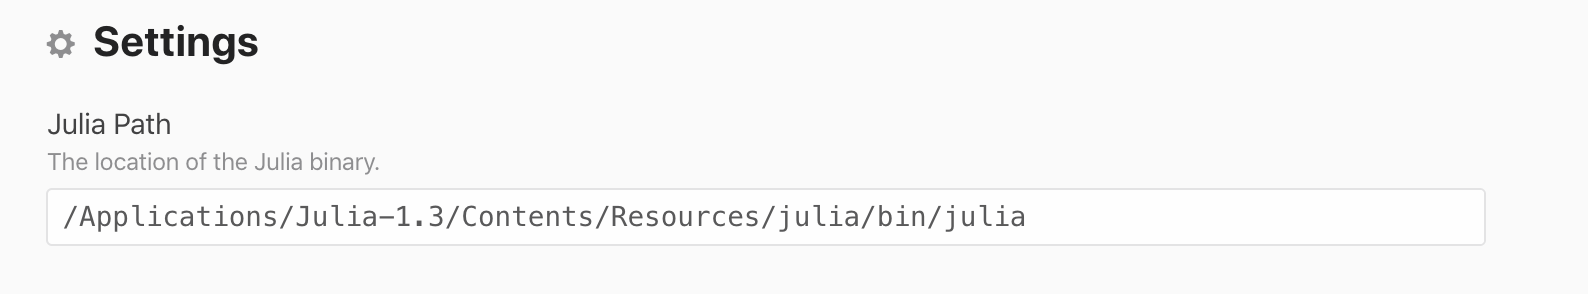

### Layout Padrão

Se você seguir as instruções, deverá ver algo semelhante a abertura de um novo arquivo.

Se não, simplesmente vá a paleta de comando and digite “Julia standard layout”.

<img src="https://julia.quantecon.org/more_julia/_static/figures/juno-standard-layout.png" style="width:100%;">
  
O painel do fundo é um REPL padrão, enquanto suporta os diferentes modos abaixo dele.

O painel de "espaço de trabalho” são objetos definidos instantaneamente.

Por exemplo, se nós definirmos um objeto no REPL:

In [6]:
x = 2

2

Nossa área de trabalho lerá:

<img src="https://julia.quantecon.org/more_julia/_static/figures/juno-workspace-1.png" style="width:100%;">

  
A variável `ans` simplesmente captura o resultado do último valor computado. 


O painel `Documentation` simplesmente nos permite consultar a documentação Julia.

<img src="https://julia.quantecon.org/more_julia/_static/figures/juno-docs.png" style="width:100%;">

  
O painel `Plots` captura os plots dos resultados do Julia (o código como se segue):

```julia
using Plots
gr(fmt = :png);
data = rand(10, 10)
h = heatmap(data)
```


<img src="https://julia.quantecon.org/more_julia/_static/figures/juno-plots.png" style="width:100%;">
  
**Observação:** As características do plot não são perfeitamente confiáveis em todos os finais da postagem, veja a página [do uso básico](http://docs.junolab.org/latest/man/basic_usage.html).

### Outras características

- `` Shift + Enter `` irá avaliar uma seleção ou linha em destaque (como abaixo). 
- O símbolo para rodar na barra lateral esquerda (ou `Ctrl+Shift+Enter`) irá rodar todo o arquivo.  


Veja [o uso básico](http://docs.junolab.org/latest/man/basic_usage.html) para exploração das características, e o [FAQ](http://docs.junolab.org/latest/man/faq.html) para mais passos avançados (ex.: usando com o`Docker`).


<a id='jl-packages'></a>

## Ambiente de Pacotes

O gerenciador de pacotes Julia deixa você configurar para o sistema “virtualenvs,” ou subconjuntos de pacotes que utilizam um conjunto de ações subjacentes na máquina.

Desse jeito, você pode trabalhar (especificamente) as dependências (pacotes são requeridos) para um projeto sem ter de se preocupar com outros.

- Um `environment` é um conjunto de pacotes especificado por um `Project.toml` (e opcionalmente, um `Manifest.toml`). 
- Um `registry` é um repositório corresponente a uma lista (típicamente) de registro dos pacotes, dos quais Julia pode puxar (para mais osbre os repositórios, veja a [versão de controle](https://lectures.quantecon.org/version_control.html)).  
- Um `depot` é um diretório, como o `~/.julia`, que contem ações (compilar coisas escondidas, registros, fonte do diretório dos pacotes, etc.)


Essencialmente, um ambiente é uma árvore de dependência para um projeto, ou um “filtro da mente” para o gerenciador de pacotes do Julia.

- Nós podemos ver o ambiente padrão (`v1.1`) como:  

In [7]:
] st

Project quantecon-notebooks-julia v0.4.0
    Status `~/repos/lecture-source-jl/_build/website/jupyter/_downloads/executed/Project.toml`
  [2169fc97] AlgebraicMultigrid v0.2.2
  [28f2ccd6] ApproxFun v0.11.5
  [7d9fca2a] Arpack v0.3.1
  [aae01518] BandedMatrices v0.10.1
  [6e4b80f9] BenchmarkTools v0.4.3
  [a134a8b2] BlackBoxOptim v0.5.0
  [ffab5731] BlockBandedMatrices v0.4.6
  [324d7699] CategoricalArrays v0.7.1
  [34da2185] Compat v2.1.0
  [a93c6f00] DataFrames v0.19.4
  [1313f7d8] DataFramesMeta v0.5.0
  [5721bf48] DataVoyager v0.3.1
  [39dd38d3] Dierckx v0.4.1
  [9fdde737] DiffEqOperators v3.5.0
  [31c24e10] Distributions v0.21.3
  [2fe49d83] Expectations v1.1.1
  [a1e7a1ef] Expokit v0.2.0
  [d4d017d3] ExponentialUtilities v1.5.1
  [442a2c76] FastGaussQuadrature v0.4.0
  [1a297f60] FillArrays v0.6.4
  [9d5cd8c9] FixedEffectModels v0.8.5 ⚲
  [c8885935] FixedEffects v0.3.0 ⚲
  [587475ba] Flux v0.9.0
  [f6369f11] ForwardDiff v0.10.3
  [38e38edf] GLM v1.3.1 ⚲
  [28b8d3ca] GR v0.41.0
  [

- Podemos também criar e ativar um novo ambiente:

In [8]:
] generate ExampleEnvironment

Generating project ExampleEnvironment:
    ExampleEnvironment/Project.toml
    ExampleEnvironment/src/ExampleEnvironment.jl


- E ir para:  

In [9]:
; cd ExampleEnvironment

/home/ubuntu/repos/lecture-source-jl/_build/website/jupyter/_downloads/executed/more_julia/ExampleEnvironment


- Para ativar o diretório, basta apenas

In [10]:
] activate .

Activating environment at `~/repos/lecture-source-jl/_build/website/jupyter/_downloads/executed/more_julia/ExampleEnvironment/Project.toml`


onde “.” representa o “diretório trabalhado presente”

- Façamos algumas mudanças: 

In [11]:
] add Expectations Parameters

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
 Resolving package versions...
  Updating `~/repos/lecture-source-jl/_build/website/jupyter/_downloads/executed/more_julia/ExampleEnvironment/Project.toml`
  [2fe49d83] + Expectations v1.1.1
  [d96e819e] + Parameters v0.12.0
  Updating `~/repos/lecture-source-jl/_build/website/jupyter/_downloads/executed/more_julia/ExampleEnvironment/Manifest.toml`
  [7d9fca2a] + Arpack v0.4.0
  [68821587] + Arpack_jll v3.5.0+2
  [b99e7846] + BinaryProvider v0.5.8
  [34da2185] + Compat v3.2.0
  [9a962f9c] + DataAPI v1.1.0
  [864edb3b] + DataStructures v0.17.9
  [31c24e10] + Distributions v0.22.3
  [2fe49d83] + Expectations v1.1.1
  [442a2c76] + FastGaussQuadrature v0.4.2
  [1a297f60] + FillArrays v0.8.4
  [e1d29d7a] + Missings v0.4.3
  [4536629a] + OpenBLAS_jll v0.3.7+5
  [efe28fd5] + OpenSpecFun_jll v0.5.3+1
  [bac558e1] + OrderedCollections v1.1.0
  [90014a1f] + PDMats v0.9.11
  [

Perceba a lacuna de vírgulas.

- Para ver as mudanças, basta abrir o diretório `ExampleEnvironment` em um editor como o Atom.  


O Projeto TOML deverá procurar algo como isso:

```text
name = "ExampleEnvironment"
uuid = "14d3e79e-e2e5-11e8-28b9-19823016c34c"
authors = ["QuantEcon User <quanteconuser@gmail.com>"]
version = "0.1.0"

[deps]
Expectations = "2fe49d83-0758-5602-8f54-1f90ad0d522b"
Parameters = "d96e819e-fc66-5662-9728-84c9c7592b0a"
```


Também podemos:

In [12]:
] precompile

Precompiling project...
Precompiling ExampleEnvironment


┌ Info: Precompiling ExampleEnvironment [91af1c2b-6561-437a-a0c7-f2a3fdf28827]
└ @ Base loading.jl:1273


**Observação** Os arquivos TOML são independentes das ações atuais (enquanto estiverem em `~/.julia/packages`, `~/.julia/dev`, e `~/.julia/compiled`).

Você pode supor do TOML ser uma demanda específica para recursos, que é suprido pelo depósito `~/.julia` do usuário.

- Para retornar ao ambiente-padrão Julia, basta:  

In [13]:
] activate

Activating environment at `~/repos/lecture-source-jl/_build/website/jupyter/_downloads/executed/Project.toml`


sem argumento algum.

- Por último, vamos limpar.  

In [14]:
; cd ..

/home/ubuntu/repos/lecture-source-jl/_build/website/jupyter/_downloads/executed/more_julia


In [15]:
; rm -rf ExampleEnvironment

### InstantiateFromURL

Com esse conhecimento, podemos explicar a configuração dos blocos.

In [16]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

O que essa função `github_project` faz é ativar (e se necessário, baixar, instanciar e pré-compilar) um ambiente Julia específico.